In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split

In [8]:
column_names = ["Population","Profit"]  
data = pd.read_csv('ex1data1.txt', names = column_names)

In [9]:
print('data shape: {}, column size: {}, row size: {}' \
      .format(data.shape, data.shape[0], data.shape[1]))

data shape: (97, 2), column size: 97, row size: 2


In [16]:
data.head(5), data.tail(5)

(   Population   Profit
 0      6.1101  17.5920
 1      5.5277   9.1302
 2      8.5186  13.6620
 3      7.0032  11.8540
 4      5.8598   6.8233,     Population   Profit
 92      5.8707  7.20290
 93      5.3054  1.98690
 94      8.2934  0.14454
 95     13.3940  9.05510
 96      5.4369  0.61705)

In [17]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


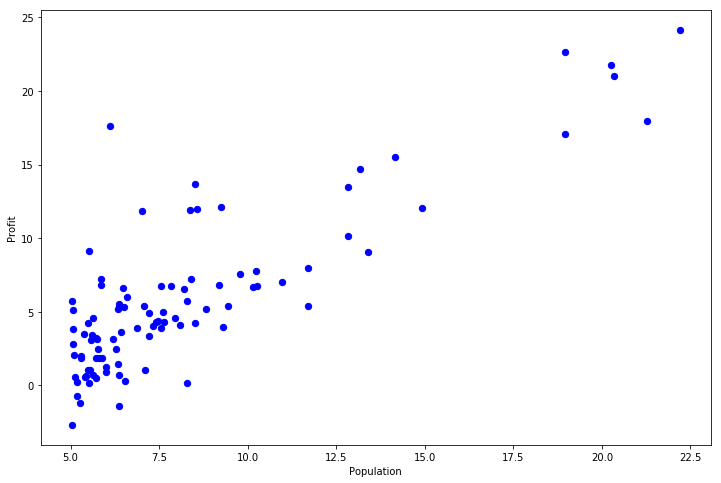

In [18]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit',
          s= 40, color = 'blue', figsize=(12,8))
# we used the initial labeling for easier comprehension.


In [24]:
nrows = data.shape[0]
ncols = data.shape[1]

x = data.loc[:, 'Population'].values 
x = x.reshape(nrows, 1)
x.shape

(97, 1)

In [25]:
nrows = data.shape[0]
ncols = data.shape[1]

y = data.loc[:, 'Profit'].values 
y = y.reshape(nrows, 1)
y.shape

(97, 1)

In [28]:
one_stack = np.ones((nrows,1))
x_stack = np.hstack((x, one_stack))
x_stack[:7]

array([[6.1101, 1.    ],
       [5.5277, 1.    ],
       [8.5186, 1.    ],
       [7.0032, 1.    ],
       [5.8598, 1.    ],
       [8.3829, 1.    ],
       [7.4764, 1.    ]])

In [30]:
def train(x,y):
    print_every = 25
    iteration = 2500
    
    theta = [[0],[0]]
    
    cost_function = np.zeros(iteration)
    for i in range(0, iteration):
        h = x @ theta
        theta = update_weight(h, theta, x)
        cost_function[i] = cost(x, theta)
        
        if i % print_every  == 0:
            print("Iteration: {}, Cost function: {} ".format(i, cost_function[i]))
    
    return theta, cost_function

In [31]:
def cost(x, theta):
    m = nrows
    h = x @ theta
    return (1/(2 * m)) * np.sum(np.square(h - y))

def update_weight(h, theta, x):
    m = nrows
    alpha = 0.001
    theta = theta - alpha * (1 / m * ( x.T @ (h - y)))
    return theta

In [32]:
theta, cost_values = train(x_stack,y)

Iteration: 0, Cost function: 27.94761974682486 
Iteration: 25, Cost function: 6.204323518572881 
Iteration: 50, Cost function: 5.893742954855769 
Iteration: 75, Cost function: 5.8769861170236295 
Iteration: 100, Cost function: 5.864367965267966 
Iteration: 125, Cost function: 5.85191769517019 
Iteration: 150, Cost function: 5.839579893933509 
Iteration: 175, Cost function: 5.827352813618294 
Iteration: 200, Cost function: 5.815235450570351 
Iteration: 225, Cost function: 5.80322682012619 
Iteration: 250, Cost function: 5.791325946594822 
Iteration: 275, Cost function: 5.779531863042289 
Iteration: 300, Cost function: 5.767843611211235 
Iteration: 325, Cost function: 5.7562602414430275 
Iteration: 350, Cost function: 5.744780812600596 
Iteration: 375, Cost function: 5.733404391991961 
Iteration: 400, Cost function: 5.722130055294463 
Iteration: 425, Cost function: 5.710956886479648 
Iteration: 450, Cost function: 5.699883977738863 
Iteration: 475, Cost function: 5.688910429409475 
Itera

In [33]:
print('our trained data: ',theta.ravel())

our trained data:  [ 0.93855117 -1.36263013]


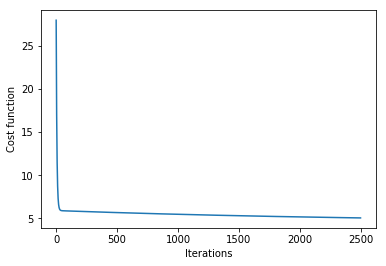

In [35]:
plt.plot(cost_values)
plt.ylabel('Cost function')
plt.xlabel('Iterations')
plt.show()

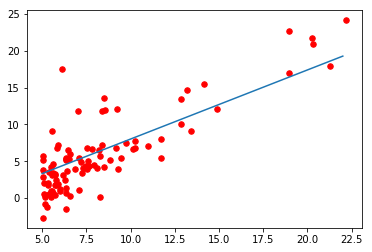

In [37]:
x_plot = np.arange(5,23)
y_plot = theta[0]*x_plot + theta[1]
plt.scatter(x[:,0], y, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

In [38]:
def predict():
    input_ = float(input('Enter the population size(10,000): '))
    print("For a population of {}, the estimated profit is ${}".format(input_, input_ * 1.2334223))

In [ ]:
predict()